In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score, confusion_matrix,\
recall_score, precision_score, accuracy_score
from src.confusion import plot_confusion_matrix
from src.k_classify import predict_one
from src.plot_train import *
from src.euclid import *

from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import train_test_split, KFold

In [38]:
from scipy.stats import kurtosis
from scipy.stats import skew

In [39]:
from scipy import stats

In [40]:
iris = sns.load_dataset('iris')
display(iris)
# Let's convert this over to NumPy array
X = iris.iloc[:, :2].to_numpy()
# Let's convert classes to numerical values
y = LabelEncoder().fit_transform(iris['species'])

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [41]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

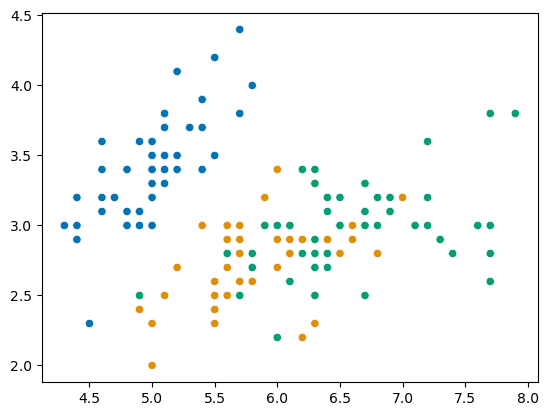

In [42]:
f, ax = plt.subplots()

sns.scatterplot(x=X[:, 0], y=X[:, 1], ax=ax, hue=y, palette='colorblind')
ax.get_legend().remove()

In [43]:
neigh = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
neigh.fit(X, y)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [44]:
# Made up data points
pred_pts = np.array([
    [7.0, 3.0],
    [8.0, 3.5],
    [7.0, 4.0],    
    [4.0, 3.0],
    [5.0, 3.0],
    [5.5, 4.0],
    [5.0, 2.0],
    [6.0, 2.5],
    [5.8, 3.5],
])

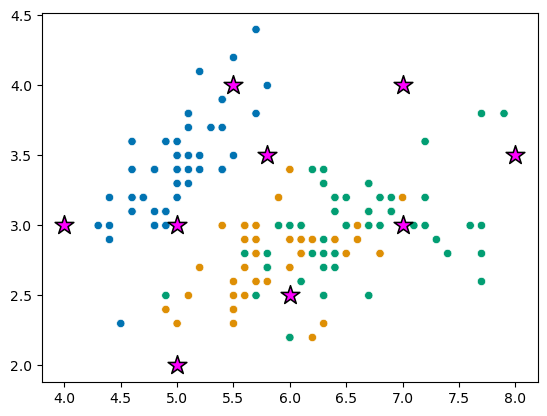

In [45]:
f, ax = plt.subplots()

sns.scatterplot(x=X[:, 0], y=X[:, 1], ax=ax, hue=y, palette='colorblind')
sns.scatterplot(x=pred_pts[:, 0], ax=ax, y=pred_pts[:, 1], marker="*",
                s=200, edgecolor='black', color='magenta')
ax.get_legend().remove()

In [46]:
# Make predictions
pred_y = neigh.predict(pred_pts)
print(pred_y)

[2 2 2 0 0 0 1 1 0]


/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [52]:
 # Probabilities for KNN (how they voted)
for p,prob in zip(pred_y,neigh.predict_proba(pred_pts)):
    print(f'{p}: {prob}')

2: [0.         0.33333333 0.66666667]
2: [0. 0. 1.]
2: [0. 0. 1.]
0: [1. 0. 0.]
0: [1. 0. 0.]
0: [1. 0. 0.]
1: [0. 1. 0.]
1: [0.         0.66666667 0.33333333]
0: [0.66666667 0.33333333 0.        ]


InvalidIndexError: (slice(None, None, None), 0)

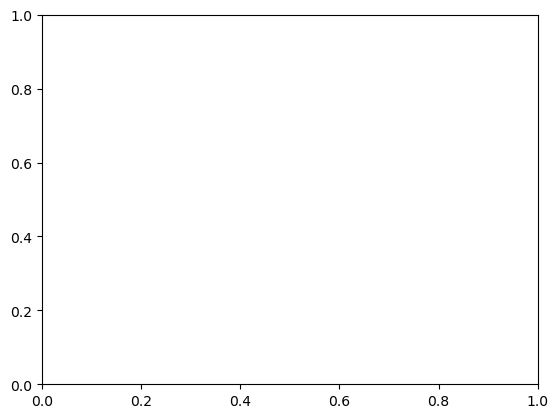

In [53]:
f, ax = plt.subplots()

sns.scatterplot(x=X[:, 0],y=X[:, 1], ax=ax, hue=y, palette='colorblind')
sns.scatterplot(x=pred_pts[:, 0], ax=ax, y=pred_pts[:, 1],
                hue=pred_y, palette='colorblind', marker="*", s=200, edgecolor='black')
ax.get_legend().remove()

In [47]:
titanic = pd.read_csv('cleaned_titanic.csv')
titanic = titanic.iloc[:, :-2]
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,youngin,male
0,1,0,3,22.0,1,0,7.2500,False,1
1,2,1,1,38.0,1,0,71.2833,False,0
2,3,1,3,26.0,0,0,7.9250,False,0
3,4,1,1,35.0,1,0,53.1000,False,0
4,5,0,3,35.0,0,0,8.0500,False,1


In [48]:
X = titanic[['Age', 'Fare']]
y = titanic['Survived']
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    test_size=0.25)

In [50]:
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train,
                                          random_state=42,
                                          test_size=0.25)

training accuracy: 0.7434869739478958
validation accuracy: 0.6467065868263473
Confusion Matrix, without normalization
[[72 29]
 [30 36]]


/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

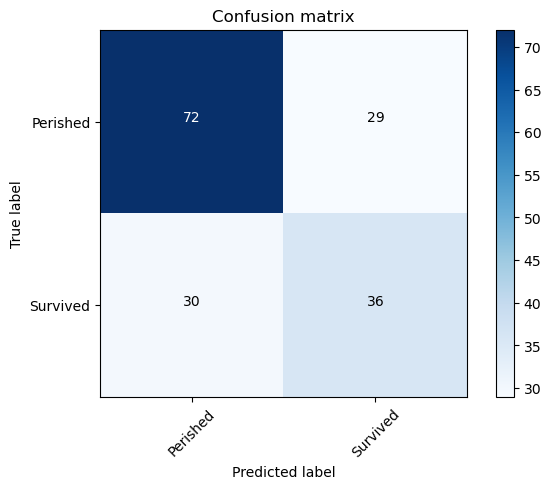

In [51]:
knn = KNeighborsClassifier()

knn.fit(X_t, y_t)
print(f"training accuracy: {knn.score(X_t, y_t)}")
print(f"validation accuracy: {knn.score(X_val, y_val)}")

y_hat = knn.predict(X_val)

plot_confusion_matrix(confusion_matrix(y_val, y_hat), classes=['Perished', 'Survived'])


/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


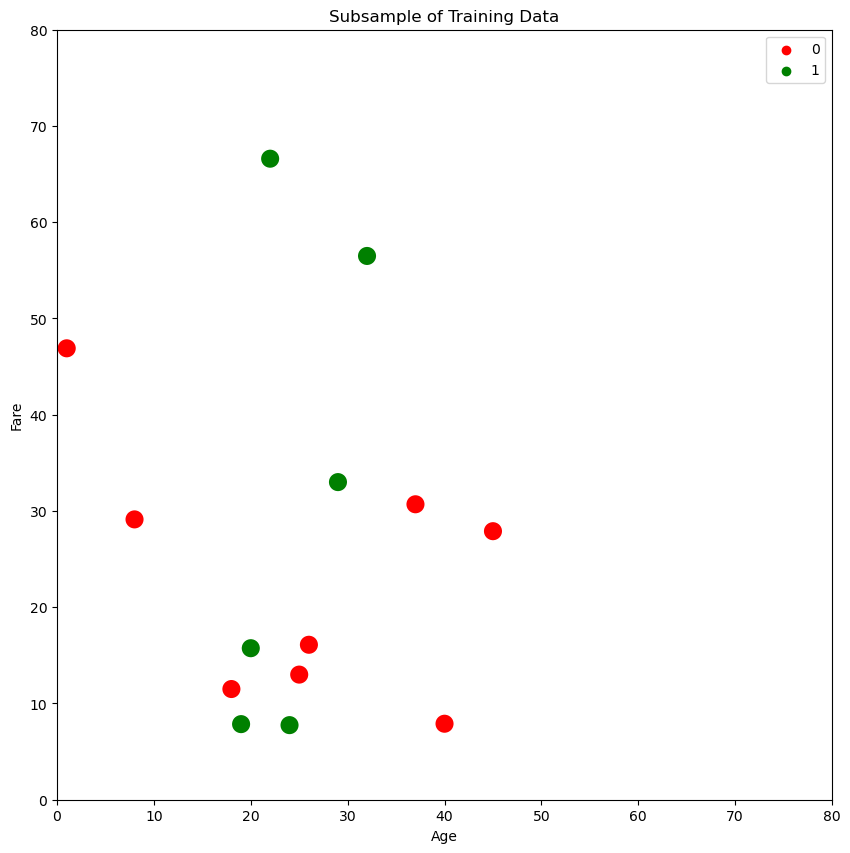

In [54]:
X_for_viz = X_t.sample(15, random_state=40)
y_for_viz = y_t[X_for_viz.index]

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(X_for_viz['Age'], X_for_viz['Fare'], 
                hue=y_for_viz, palette={0: 'red', 1: 'green'}, 
                s=200, ax=ax)

ax.set_xlim(0, 80)
ax.set_ylim(0, 80)
plt.legend()
plt.title('Subsample of Training Data');

/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


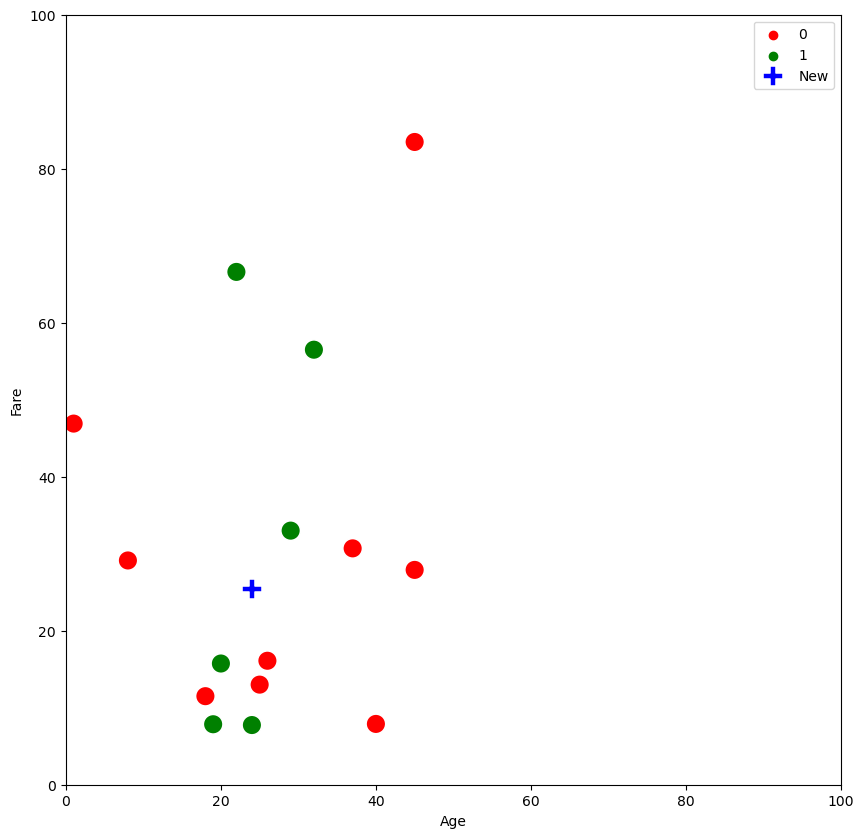

In [55]:
X_for_viz = X_t.sample(15, random_state=40)
y_for_viz = y_t[X_for_viz.index]

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(X_for_viz['Age'], X_for_viz['Fare'],
                hue=y_for_viz, palette={0: 'red', 1: 'green'},
                s=200, ax=ax)

plt.legend()

#################^^^Old code^^^##############
####################New code#################

# Let's take one sample from our validation set and plot it
new_x = pd.DataFrame(X_val.loc[484]).T
new_y = y_val[new_x.index]

sns.scatterplot(new_x['Age'], new_x['Fare'], color='blue',
                s=200, ax=ax, label='New', marker='P')

ax.set_xlim(0, 100)
ax.set_ylim(0, 100);

In [56]:
new_x

,Age,Fare
484,24.0,25.4667


In [57]:
knn = KNeighborsClassifier(n_neighbors=1)

In [58]:
knn.fit(X_for_viz, y_for_viz)
knn.predict(new_x)


/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1])

In [59]:
knn3 = KNeighborsClassifier(n_neighbors=3)

In [60]:
knn3.fit(X_for_viz, y_for_viz)
knn3.predict(new_x)

/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1])

      Age     Fare
484  24.0  25.4667


/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


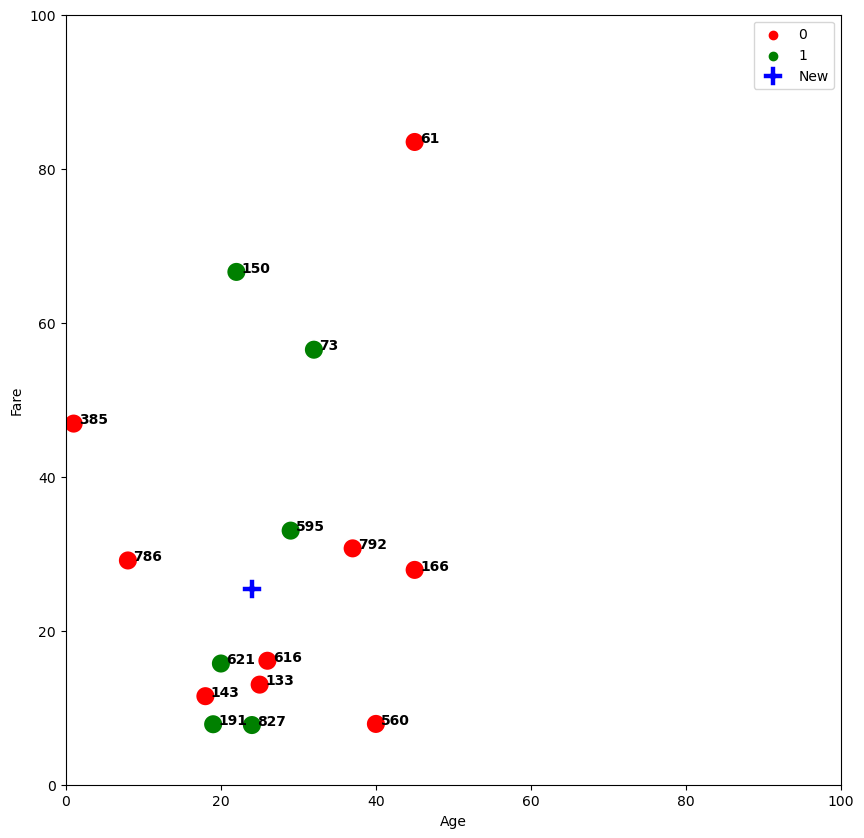

In [61]:
X_for_viz = X_t.sample(15, random_state=40)
y_for_viz = y_t[X_for_viz.index]

fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(X_for_viz['Age'], X_for_viz['Fare'], hue=y_for_viz, 
                palette={0: 'red', 1: 'green'}, s=200, ax=ax)


# Now let's take another sample

# new_x = X_val.sample(1, random_state=33)
new_x = pd.DataFrame(X_val.loc[484]).T
new_x.columns = ['Age', 'Fare']
new_y = y_val[new_x.index]

print(new_x)
sns.scatterplot(new_x['Age'], new_x['Fare'], color='blue', 
                s=200, ax=ax, label='New', marker='P')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.legend()

#################^^^Old code^^^##############
####################New code#################

# add annotations one by one with a loop
for index in X_for_viz.index:
    ax.text(X_for_viz.Age[index]+0.7, X_for_viz.Fare[index],
            s=index, horizontalalignment='left', size='medium',
            color='black', weight='semibold')

In [62]:
df_for_viz = pd.merge(X_for_viz, y_for_viz, left_index=True, right_index=True)
neighbor = NearestNeighbors(n_neighbors=3)
neighbor.fit(X_for_viz)
nearest = neighbor.kneighbors(new_x)

nearest

(array([[ 9.04160433,  9.5778426 , 10.51549452]]), array([[11,  5,  0]]))

In [63]:
df_for_viz.iloc[nearest[1][0]]


,Age,Fare,Survived
595,29.0,33.0000,1
616,26.0,16.1000,0
621,20.0,15.7417,1


In [64]:
new_x


,Age,Fare
484,24.0,25.4667


In [65]:
# Use Euclidean distance to see how close they are to this point
print(((29-24)**2 + (33-25.4667)**2)**0.5)
print(((26-24)**2 + (16.1-25.4667)**2)**0.5)
print(((20-24)**2 + (15.7417-25.4667)**2)**0.5)

9.041604331643805
9.57784260102451
10.515494519992865


In [67]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_for_viz, y_for_viz)
knn.predict(new_x)

/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0])

In [68]:
for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_for_viz, y_for_viz)
    print(f'k={k}', knn.predict(new_x))

k=1 [1]
k=3 [1]
k=5 [0]
k=7 [0]
k=9 [0]


/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

In [69]:
new_y

484    0
Name: Survived, dtype: int64

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    test_size=0.25)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train,
                                          random_state=42,
                                          test_size=0.25)

knn = KNeighborsClassifier(n_neighbors=5)

ss = StandardScaler()
X_ind = X_t.index
X_col = X_t.columns

X_t_s = pd.DataFrame(ss.fit_transform(X_t))
X_t_s.index = X_ind
X_t_s.columns = X_col

X_v_ind = X_val.index
X_val_s = pd.DataFrame(ss.transform(X_val))
X_val_s.index = X_v_ind
X_val_s.columns = X_col

knn.fit(X_t_s, y_t)
print(f"training accuracy: {knn.score(X_t_s, y_t)}")
print(f"Val accuracy: {knn.score(X_val_s, y_val)}")

y_hat = knn.predict(X_val_s)

training accuracy: 0.7114228456913828
Val accuracy: 0.6407185628742516


/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

      Age     Fare
484  24.0  25.4667
        Age      Fare
484 -0.4055 -0.154222


/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

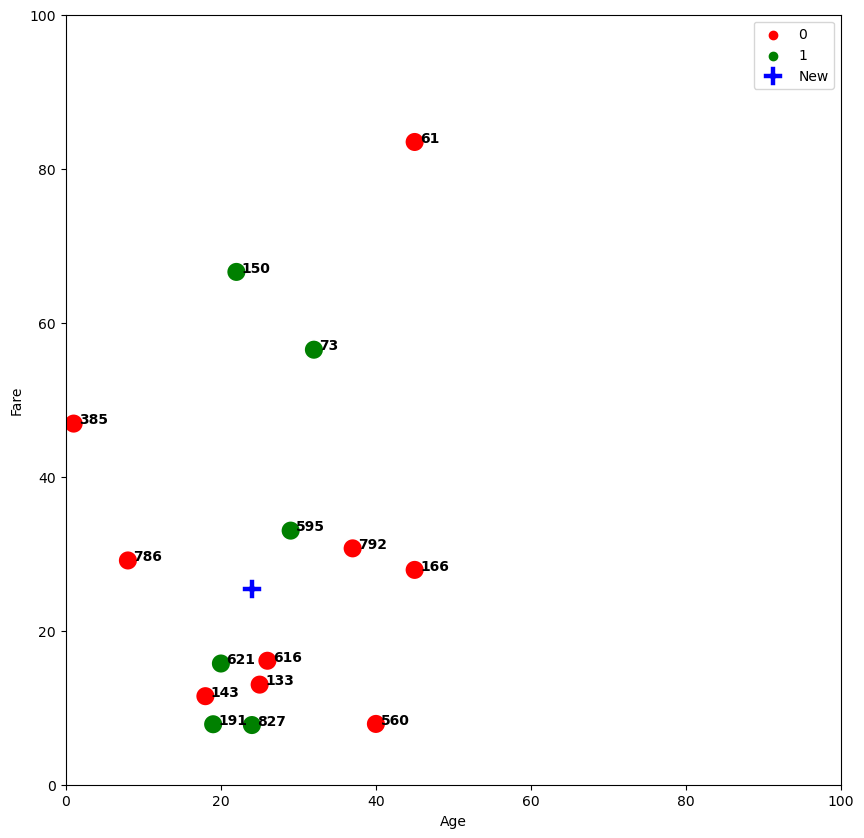

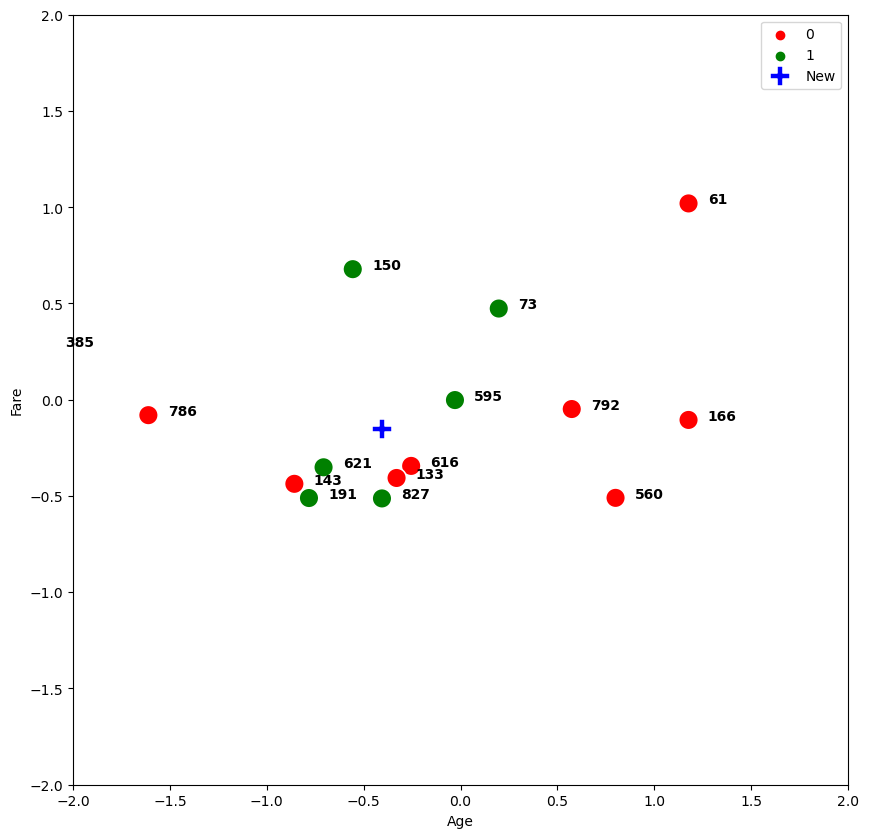

In [71]:
# The plot_train() function just does what we did above.

plot_train(X_t, y_t, X_val, y_val)
plot_train(X_t_s, y_t, X_val_s, y_val, -2, 2, text_pos=0.1 )

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    test_size=0.25)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train,
                                          random_state=42,
                                          test_size=0.25)

# The predict_one() function prints predictions on a given point
# (#484) for k-nn models with k ranging from 1 to 10.

predict_one(X_t, X_val, y_t, y_val)

[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

In [73]:
mm = MinMaxScaler()

X_t_s = pd.DataFrame(mm.fit_transform(X_t))
X_t_s.index = X_t.index
X_t_s.columns = X_t.columns

X_val_s = pd.DataFrame(mm.transform(X_val))
X_val_s.index = X_val.index
X_val_s.columns = X_val.columns


predict_one(X_t_s, X_val_s, y_t, y_val)

[0]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]


/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    test_size=0.25)

In [76]:
#et's slowly increase k and see what happens to our accuracy scores.

kf = KFold(n_splits=5)

k_scores_train = {}
k_scores_val = {}


for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy_score_t = []
    accuracy_score_v = []
    for train_ind, val_ind in kf.split(X_train, y_train):
        
        X_t, y_t = X_train.iloc[train_ind], y_train.iloc[train_ind] 
        X_v, y_v = X_train.iloc[val_ind], y_train.iloc[val_ind]
        mm = MinMaxScaler()
        
        X_t_ind = X_t.index
        X_v_ind = X_v.index
        
        X_t = pd.DataFrame(mm.fit_transform(X_t))
        X_t.index = X_t_ind
        X_v = pd.DataFrame(mm.transform(X_v))
        X_v.index = X_v_ind
        
        knn.fit(X_t, y_t)
        
        y_pred_t = knn.predict(X_t)
        y_pred_v = knn.predict(X_v)
        
        accuracy_score_t.append(accuracy_score(y_t, y_pred_t))
        accuracy_score_v.append(accuracy_score(y_v, y_pred_v))
        
        
    k_scores_train[k] = np.mean(accuracy_score_t)
    k_scores_val[k] = np.mean(accuracy_score_v)

/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

In [77]:
k_scores_train


{1: 0.952702817080224,
 2: 0.798807290270705,
 3: 0.787171493461609,
 4: 0.7428733654022486,
 5: 0.7406156103203599,
 6: 0.7188520080689529,
 7: 0.7162253664179209,
 8: 0.7060876863829367,
 9: 0.7027042277363202,
 10: 0.7000811127255286,
 11: 0.7008372243930652,
 12: 0.6997115208283372,
 13: 0.6982056454456969,
 14: 0.696330178165865,
 15: 0.7019643386138894,
 16: 0.6940759497242168,
 17: 0.6959521223320968,
 18: 0.6944504789177446,
 19: 0.6970771205687766}

In [78]:
k_scores_val


{1: 0.6201997531141286,
 2: 0.6382673100662103,
 3: 0.611199640893278,
 4: 0.6457861070586915,
 5: 0.6457299966333745,
 6: 0.6533049040511727,
 7: 0.6382560879811469,
 8: 0.6562675345079116,
 9: 0.6682863876108182,
 10: 0.6667826282123219,
 11: 0.6577937380765346,
 12: 0.6712939064078105,
 13: 0.6578049601615981,
 14: 0.6683088317809449,
 15: 0.6547862192795422,
 16: 0.6592862753899674,
 17: 0.6502412748288633,
 18: 0.6532712377959825,
 19: 0.6562899786780384}

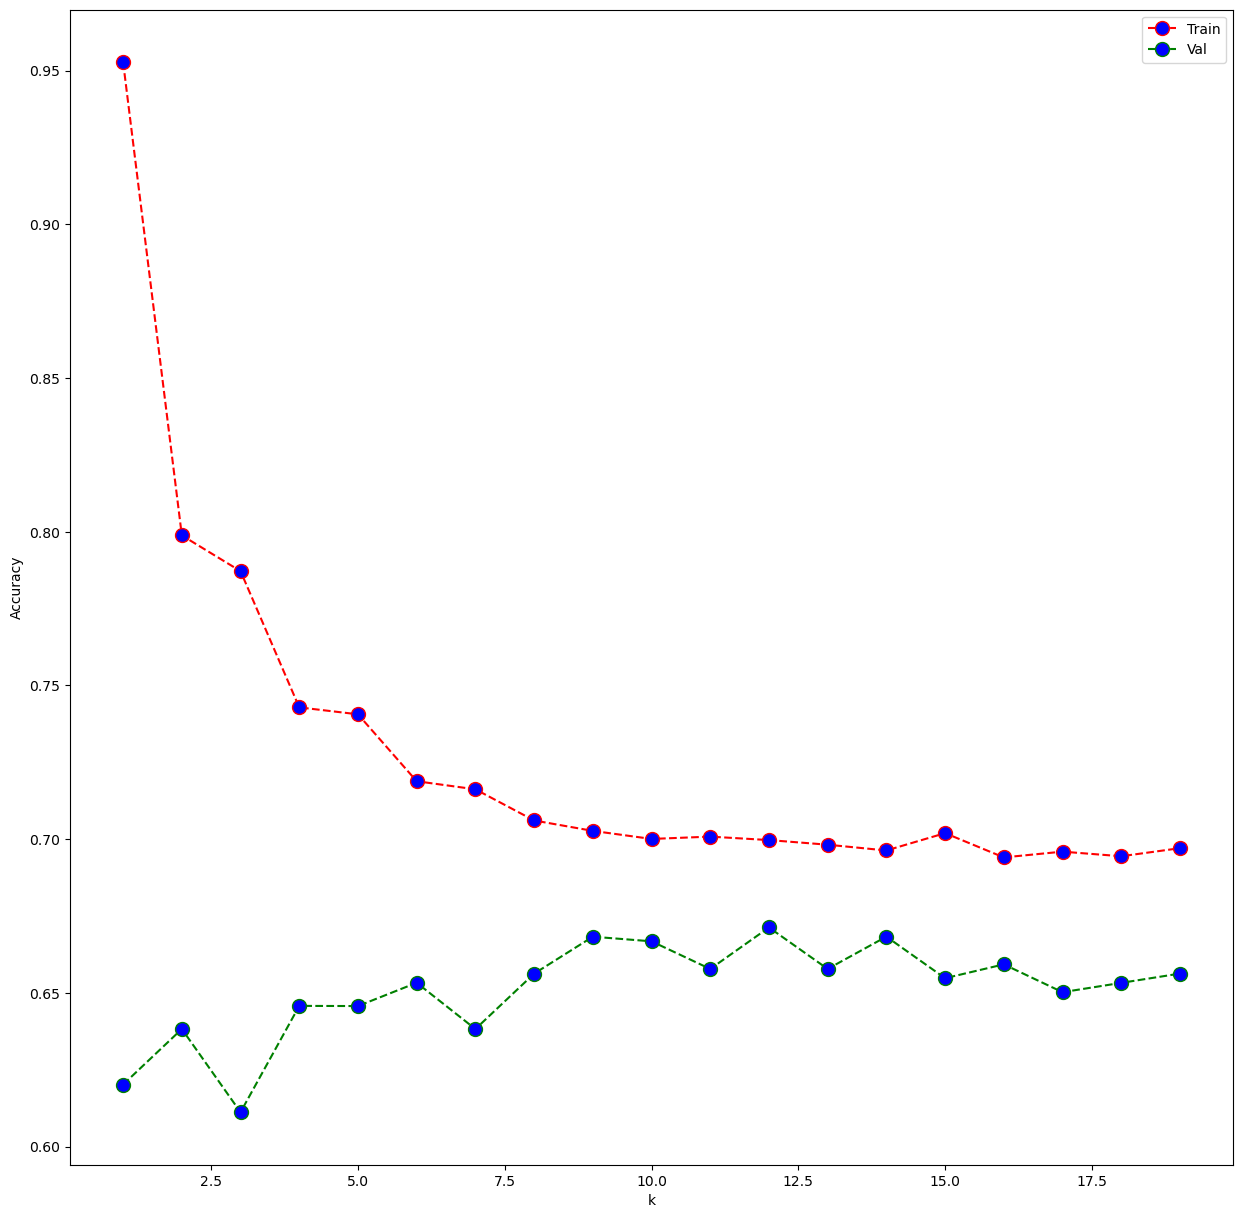

In [79]:
fig, ax = plt.subplots(figsize=(15, 15))

ax.plot(list(k_scores_train.keys()), list(k_scores_train.values()),
        color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10, label='Train')
ax.plot(list(k_scores_val.keys()), list(k_scores_val.values()),
        color='green', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10, label='Val')
ax.set_xlabel('k')
ax.set_ylabel('Accuracy')
plt.legend();

training accuracy: 0.7087087087087087
Test accuracy: 0.7040358744394619
Confusion Matrix, without normalization
[[120  21]
 [ 45  37]]


/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

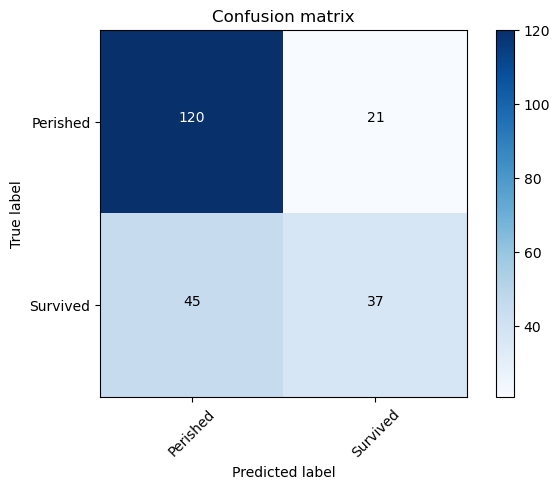

In [80]:
mm = MinMaxScaler()

X_train_ind = X_train.index
X_train = pd.DataFrame(mm.fit_transform(X_train))
X_train.index = X_train_ind

X_test_ind = X_test.index
X_test =  pd.DataFrame(mm.transform(X_test))
X_test.index = X_test_ind

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

print(f"training accuracy: {knn.score(X_train, y_train)}")
print(f"Test accuracy: {knn.score(X_test, y_test)}")

y_hat = knn.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_hat), classes=['Perished', 'Survived'])

In [81]:
recall_score(y_test, y_hat)

0.45121951219512196

In [82]:
precision_score(y_test, y_hat)

0.6379310344827587